In [24]:
import pandas as pd

df = pd.read_csv('parsed_values_study.csv', error_bad_lines=False, header = 0, sep=',')

In [25]:
def get_PSS_cat(x):
    if x <13:
        return 1
    if x >=13 and x<=26:
        return 2
    if x >=27:
        return 3
    
df['PSS_category'] = df['stress_score'].apply(lambda x: get_PSS_cat(x))

In [26]:
attributes = ['independent','playful','compromising','conservative',
              'spontaneous','punctual','organised','teamplayer','serious',
              'opinionated','helpful','influential','fastpaced','liberal',
              'thoughtful','hardworking']

def identity_category(core, middle, string):
    if string in core:
        return 3
    elif string in middle:
        return 2
    else:
        return 0
    
for vals in attributes:
    df[vals] = df.apply(lambda x: identity_category(x['core_identity'], x['middle_identity'], vals), axis=1)
        

In [27]:
def get_stressful_situations(x, i):
    x = x.replace('[', '').replace(']', '').split(',')
    return x[i]
    

for i in range (0,16):
    df[(f'situation_{i}')] = df.apply(lambda x: get_stressful_situations(x['stressful_situation_rating'], i), axis=1)

In [30]:
df

,Unnamed: 0,activation_code,total_time_spent,age,num_kids,stress_score,stressful_situation_rating,rep_grid_elements_id,NPS_repgrid,feeling_repgrid_activity,...,situation_6,situation_7,situation_8,situation_9,situation_10,situation_11,situation_12,situation_13,situation_14,situation_15
0,0,GmFzhmi5,14,31,1,11,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1]","[0, 1, 11, 4, 12, 13]",No,2,...,2,2,2,2,2,2,1,1,1,1
1,1,PzFlGYUC,23,25,0,21,"[2, 0, 1, 1, 1, 2, 2, 1, 2, 1, 0, 0, 2, 1, 0, 2]","[0, 1, 13, 12, 2, 9]",No,3,...,2,1,2,1,0,0,2,1,0,2
2,2,6p5vutqW,16,35,1,14,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]","[0, 1, 12, 13, 8, 2]",No,3,...,0,0,0,0,0,0,0,1,0,0
3,3,lZUOKm6S,24,35,0,19,"[2, 0, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0]","[0, 1, 12, 2, 13, 4, 9, 3]",No,2,...,1,0,1,1,1,1,0,0,1,0
4,4,rhyDsIWL,67,30,0,14,"[1, 1, 2, 0, 1, 0, 1, 0, 2, 2, 2, 1, 2, 0, 1, 1]","[0, 1, 10, 5, 9, 11]",No,2,...,1,0,2,2,2,1,2,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,127,WzPlNvAQ,14,33,1,19,"[2, 1, 2, 2, 1, 0, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2]","[0, 1, 12, 13, 9, 6]",Yes,2,...,2,1,2,2,1,1,2,1,1,2
128,128,VjnRWmQA,11,32,0,24,"[2, 1, 2, 2, 0, 1, 2, 0, 2, 1, 1, 2, 2, 2, 2, 2]","[0, 1, 13, 3, 7, 8]",No,3,...,2,0,2,1,1,2,2,2,2,2
129,129,mWcZ8Bv6,22,39,1,14,"[1, 2, 1, 1, 1, 0, 1, 0, 2, 1, 1, 0, 2, 2, 1, 2]","[0, 1, 4, 12, 7, 9, 13]",No,2,...,1,0,2,1,1,0,2,2,1,2
130,130,2iH5z9GN,18,42,0,18,"[2, 1, 2, 2, 0, 1, 2, 0, 1, 2, 0, 1, 1, 1, 2, 2]","[0, 1, 9, 11, 2, 8]",Yes,3,...,2,0,1,2,0,1,1,1,2,2


In [7]:
import numpy as np
np.std(df['PSS_category'])

0.528079755086165

In [8]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 

In [35]:
feature_cols = ['age', 'num_kids','independent','playful','compromising','conservative',
                'spontaneous','punctual','organised','teamplayer','serious',
                'opinionated','helpful','influential','fastpaced','liberal',
                'thoughtful','hardworking', 'situation_0', 'situation_1', 'situation_2', 'situation_3',
                'situation_4', 'situation_5', 'situation_6', 'situation_7', 
                'situation_8', 'situation_9', 'situation_10', 'situation_11', 
                'situation_12', 'situation_13', 'situation_14', 'situation_15']
X = df[feature_cols] # Features
y = df.PSS_category # Target variable

In [42]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [43]:
clf = DecisionTreeClassifier(criterion = 'entropy')

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [44]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6428571428571429


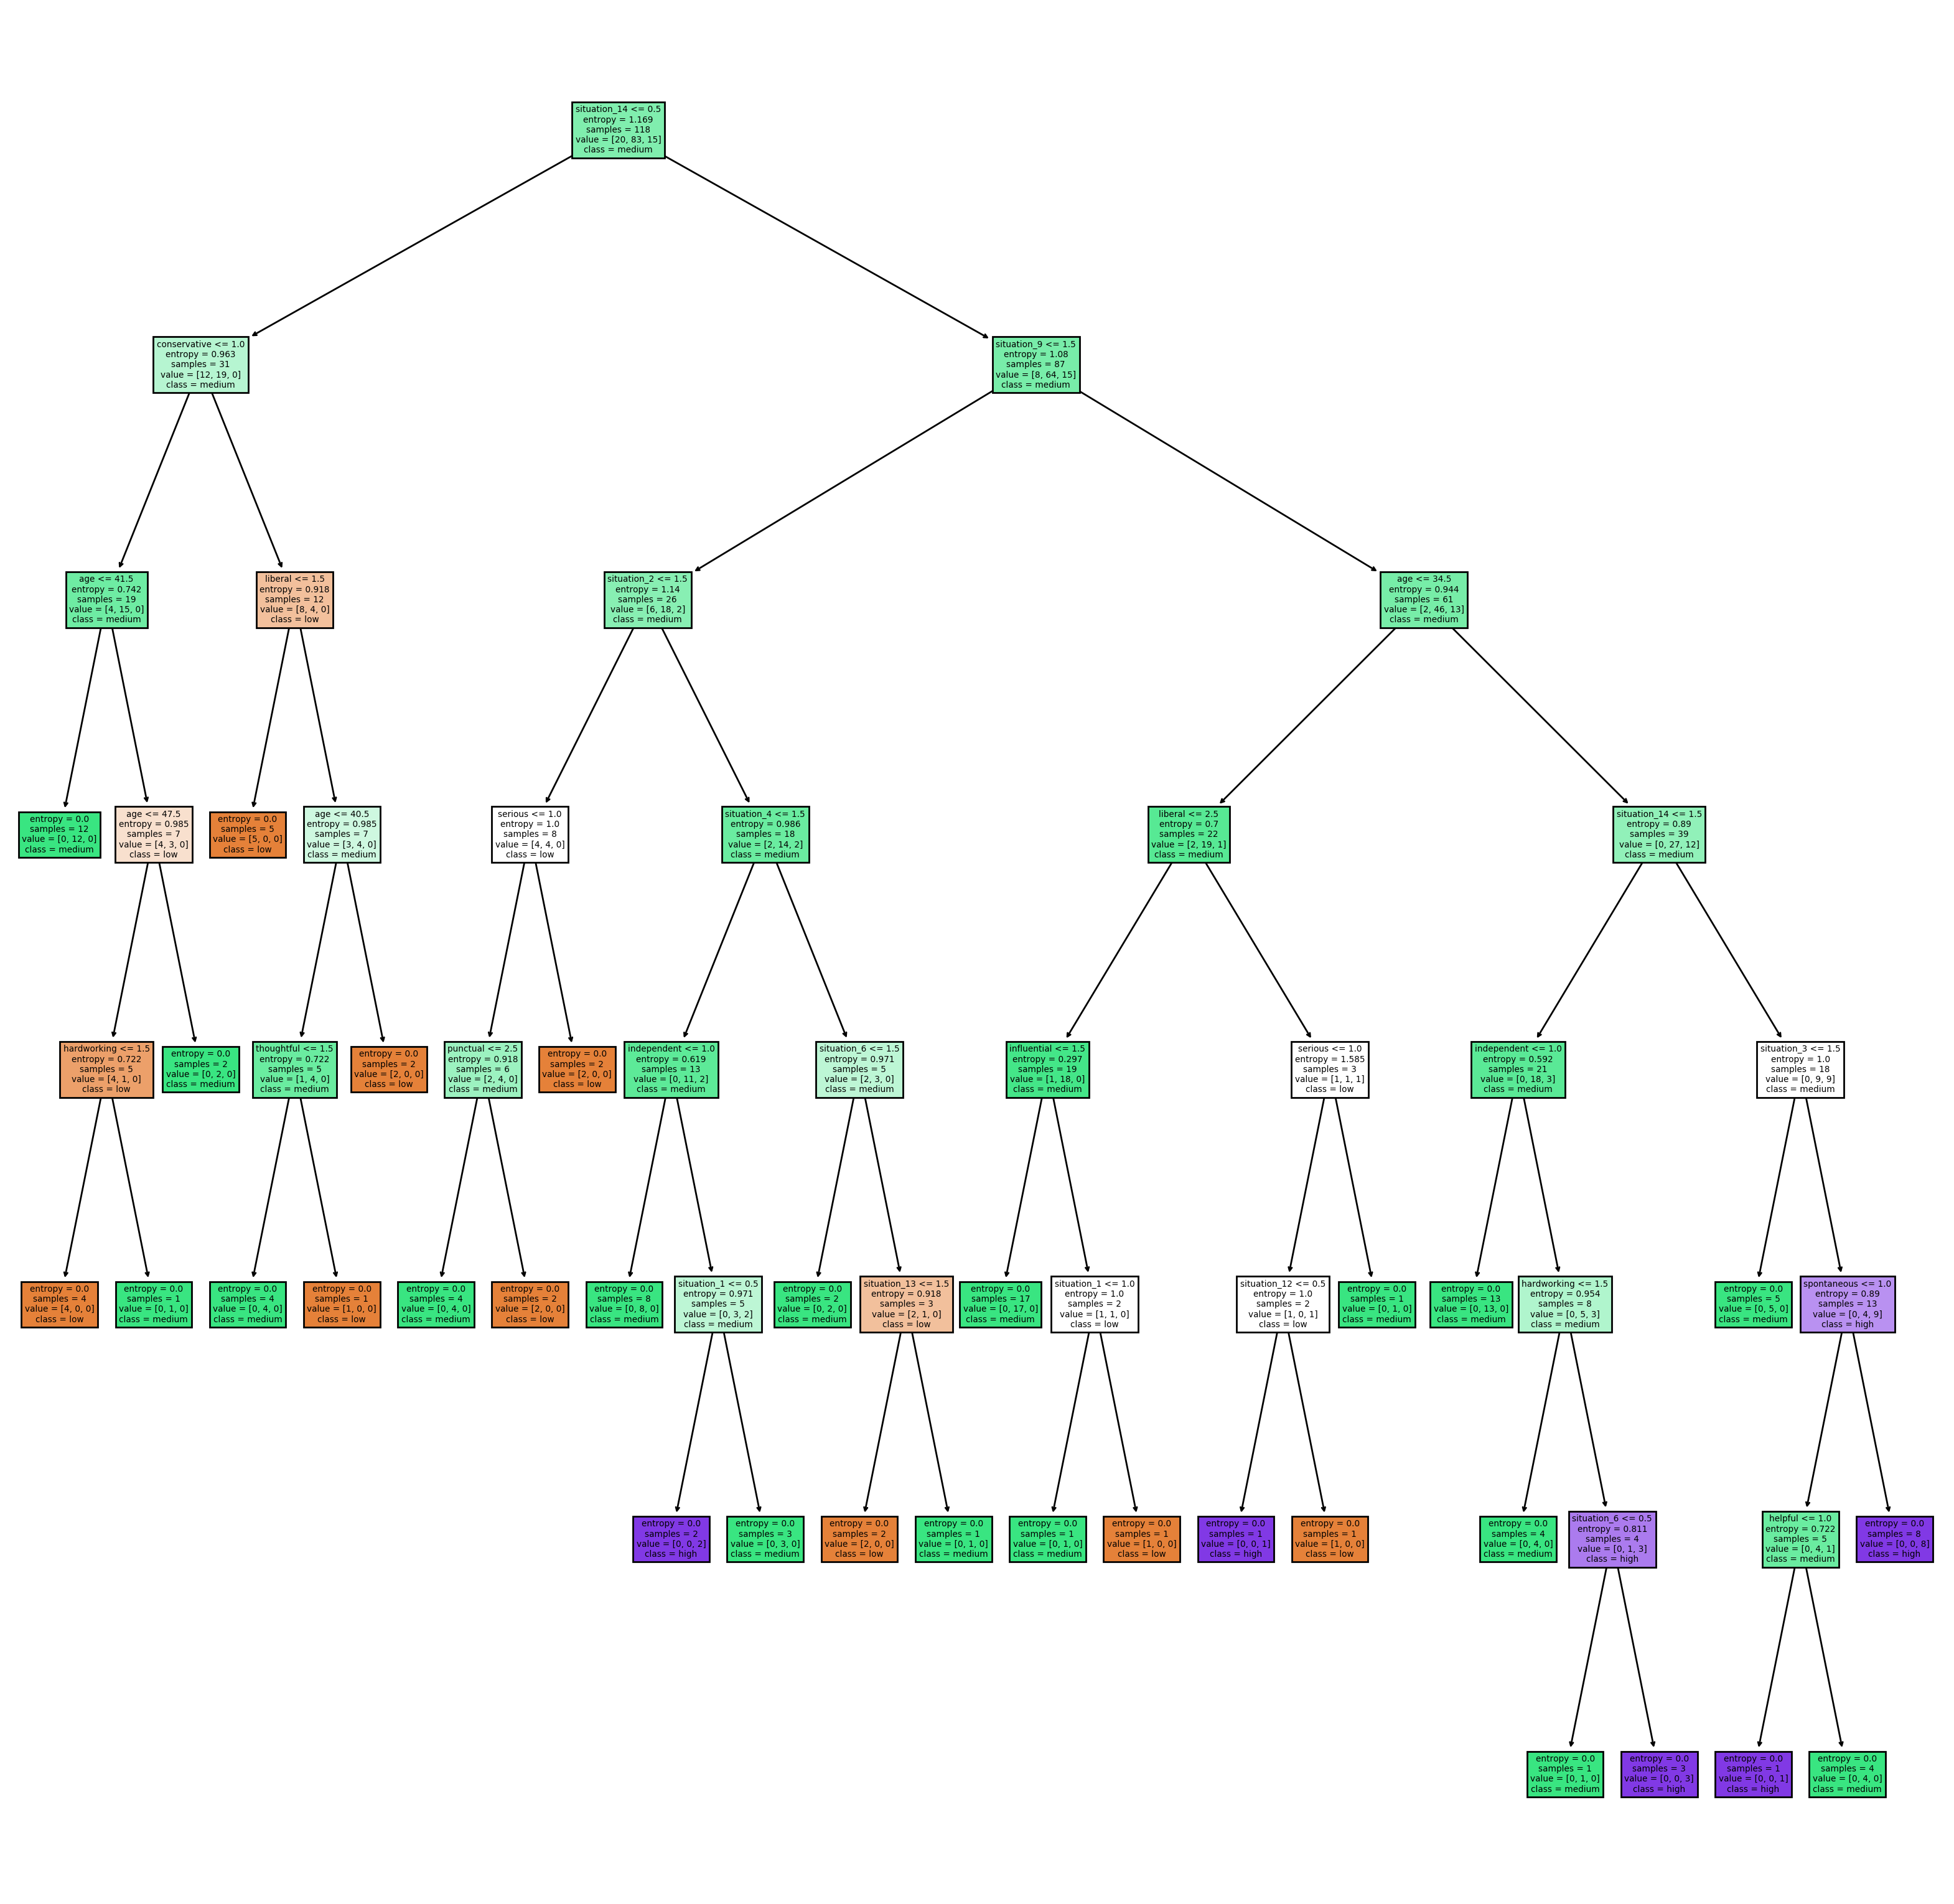

In [46]:
from sklearn.datasets import load_iris
from sklearn import tree
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20), dpi=200)
tree.plot_tree(clf,
               feature_names = feature_cols, 
               class_names=['low', 'medium', 'high'],
               filled = True);
fig.savefig('decisiontree.png')